# Scanpy: Dimensionality reduction 

## Experiment the sample distance matrics in UMAP representation.

## Data preparation
***

First, let's load all necessary libraries and the QC-filtered dataset from the previous step.


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import scipy.stats as st
from scipy import stats

np.random.seed(41)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_versions()

In [2]:
sc.settings.set_figure_params(dpi=110)

In [3]:
adata = sc.read_h5ad("./data/h5ab_folder/gse159812_raw_covid_normalized_preprocessed.h5ad")

In [4]:
# All process until the UMAP section of `scanpy_dim_reduction.ipynb` has been done.
adata

AnnData object with n_obs × n_vars = 114701 × 2680
    obs: 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_id', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/opt/homebrew/Caskroom/miniforge/base/envs/scanpy_tutorial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


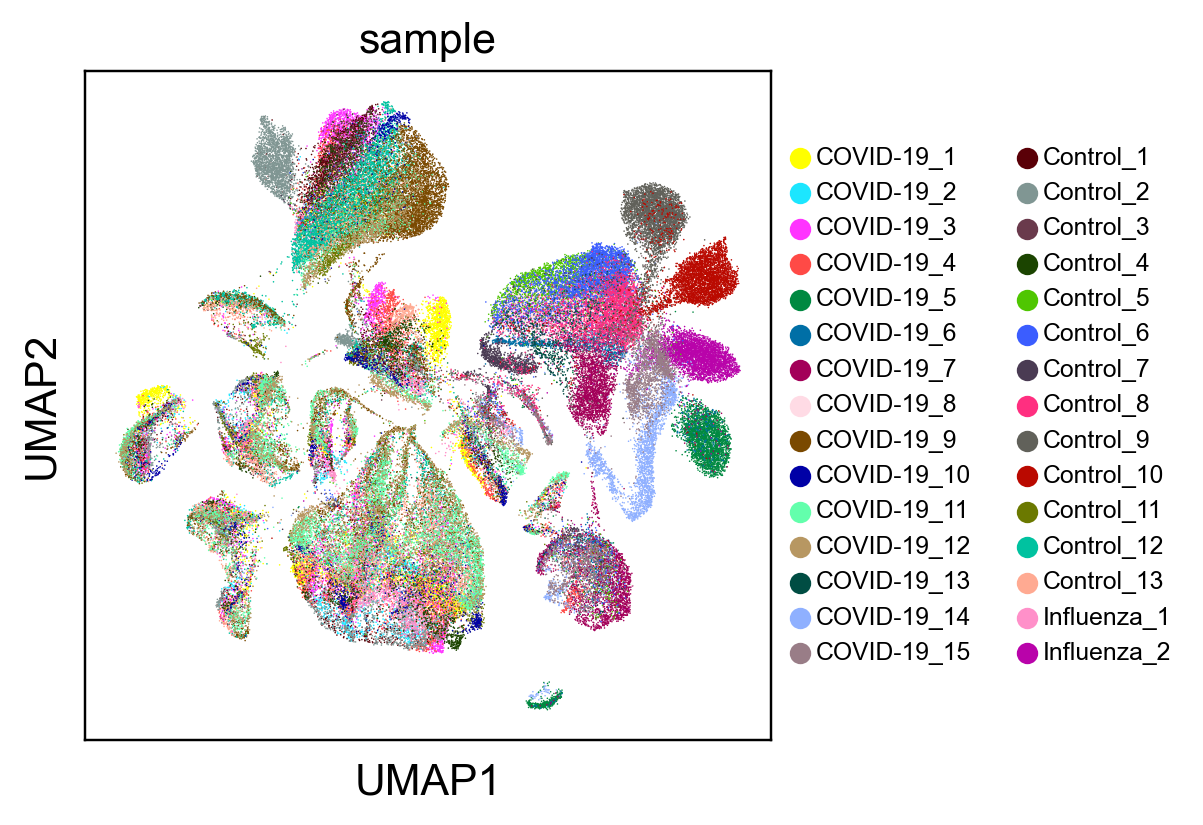

In [9]:
# Plot UMAP representation
sc.pl.umap(adata, color="sample", legend_fontsize="xx-small")

/opt/homebrew/Caskroom/miniforge/base/envs/scanpy_tutorial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


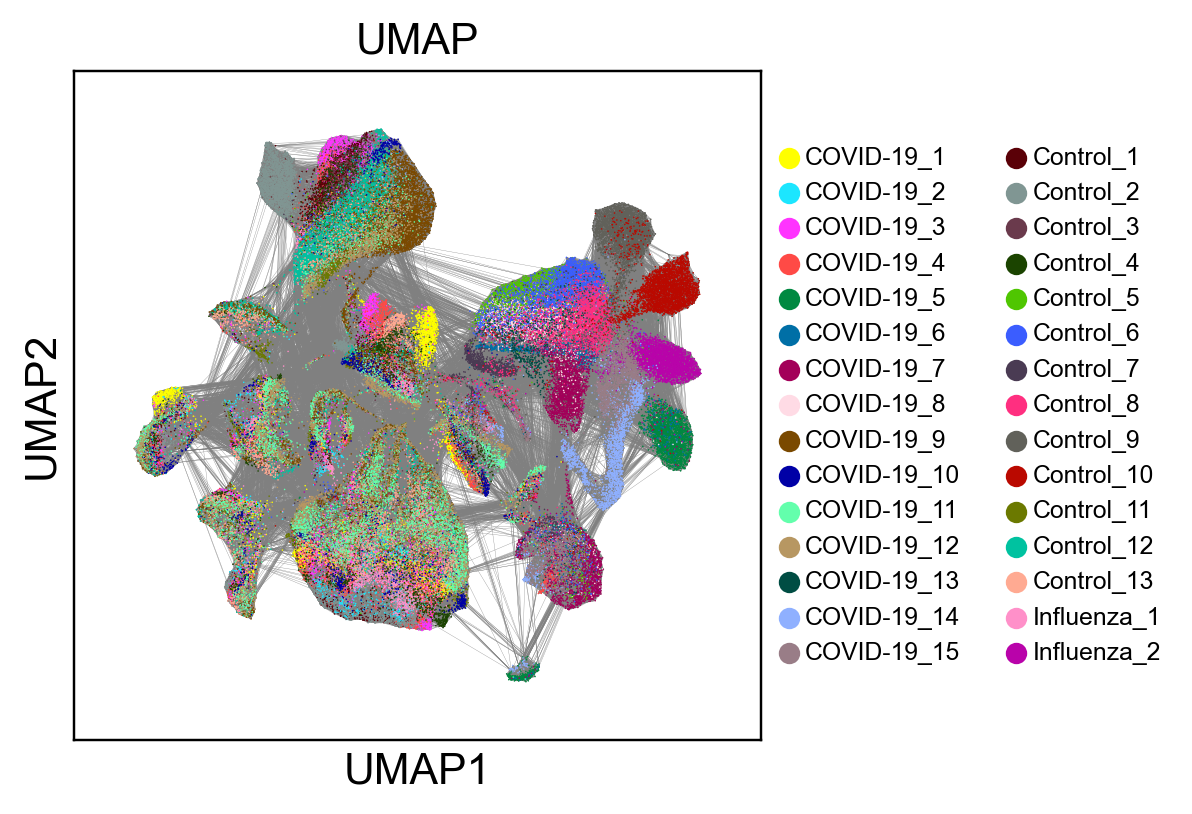

In [11]:
# we can also plot the umap with neighbor edges
sc.pl.umap(adata, color="sample", title="UMAP", edges=True, legend_fontsize="xx-small")

In [12]:
adata.obs

,sample,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt2,n_counts,n_genes,S_score,G2M_score,phase,doublet_scores,predicted_doublets,doublet_info
AAACCCAAGGCTTTCA,COVID-19_1,0,2089,3665.0,1.0,0.027285,11.0,0.300136,0.0,0.000000,NaN,3665.0,2089,-0.041944,0.004079,G2M,0.221875,False,False
AAACCCACAGGTATGG,COVID-19_1,0,1716,3132.0,1.0,0.031928,8.0,0.255428,0.0,0.000000,NaN,3132.0,1716,-0.028245,-0.055944,G1,0.018135,False,False
AAACCCATCGAGTACT,COVID-19_1,0,4228,9130.0,37.0,0.405257,34.0,0.372399,2.0,0.021906,NaN,9130.0,4228,-0.011416,-0.092075,G1,0.212274,False,False
AAACCCATCGTGGTAT,COVID-19_1,0,479,563.0,0.0,0.000000,4.0,0.710480,0.0,0.000000,NaN,563.0,479,-0.021918,-0.012821,G1,0.008351,False,False
AAACGAAAGAAGAACG,COVID-19_1,0,2468,4163.0,8.0,0.192169,35.0,0.840740,0.0,0.000000,NaN,4163.0,2468,0.003457,-0.023310,S,0.114469,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCACAACGCC,COVID-19_15,29,3667,8992.0,181.0,2.012900,86.0,0.956406,2.0,0.022242,NaN,8992.0,3667,-0.095173,-0.006410,G1,0.071136,False,False
TTTGGTTGTACAAGCG,COVID-19_15,29,602,856.0,51.0,5.957944,6.0,0.700935,0.0,0.000000,NaN,856.0,602,-0.017808,0.011072,G2M,0.028046,False,False
TTTGTTGAGCCGTAAG,COVID-19_15,29,958,1469.0,131.0,8.917631,4.0,0.272294,1.0,0.068074,NaN,1469.0,958,-0.031507,-0.017483,G1,0.056483,False,False
TTTGTTGCAAGCGGAT,COVID-19_15,29,2297,5004.0,800.0,15.987210,35.0,0.699440,0.0,0.000000,NaN,5004.0,2297,-0.035943,-0.051865,G1,0.080871,False,False


### Add a new columns: covid_non_covid to adata.obs

This allows us to visualize clusters in UMAP with only a covid patients and non-covid patients.

In [13]:
# All unique values from `sample` column
adata.obs["sample"].unique()

['COVID-19_1', 'COVID-19_2', 'COVID-19_3', 'COVID-19_4', 'Influenza_1', ..., 'COVID-19_11', 'COVID-19_12', 'COVID-19_13', 'COVID-19_14', 'COVID-19_15']
Length: 30
Categories (30, object): ['COVID-19_1', 'COVID-19_2', 'COVID-19_3', 'COVID-19_4', ..., 'Control_12', 'Control_13', 'Influenza_1', 'Influenza_2']

In [14]:
for index, row in adata.obs.iterrows():
    sample = row["sample"]
    if "covid" in sample or "COVID" in sample:
        new_value = "covid"
    else:
        new_value = "non_covid"

    adata.obs.at[index, "covid_non_covid"] = new_value

In [15]:
adata.obs

,sample,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt2,n_counts,n_genes,S_score,G2M_score,phase,doublet_scores,predicted_doublets,doublet_info,covid_non_covid
AAACCCAAGGCTTTCA,COVID-19_1,0,2089,3665.0,1.0,0.027285,11.0,0.300136,0.0,0.000000,NaN,3665.0,2089,-0.041944,0.004079,G2M,0.221875,False,False,covid
AAACCCACAGGTATGG,COVID-19_1,0,1716,3132.0,1.0,0.031928,8.0,0.255428,0.0,0.000000,NaN,3132.0,1716,-0.028245,-0.055944,G1,0.018135,False,False,covid
AAACCCATCGAGTACT,COVID-19_1,0,4228,9130.0,37.0,0.405257,34.0,0.372399,2.0,0.021906,NaN,9130.0,4228,-0.011416,-0.092075,G1,0.212274,False,False,covid
AAACCCATCGTGGTAT,COVID-19_1,0,479,563.0,0.0,0.000000,4.0,0.710480,0.0,0.000000,NaN,563.0,479,-0.021918,-0.012821,G1,0.008351,False,False,covid
AAACGAAAGAAGAACG,COVID-19_1,0,2468,4163.0,8.0,0.192169,35.0,0.840740,0.0,0.000000,NaN,4163.0,2468,0.003457,-0.023310,S,0.114469,False,False,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCACAACGCC,COVID-19_15,29,3667,8992.0,181.0,2.012900,86.0,0.956406,2.0,0.022242,NaN,8992.0,3667,-0.095173,-0.006410,G1,0.071136,False,False,covid
TTTGGTTGTACAAGCG,COVID-19_15,29,602,856.0,51.0,5.957944,6.0,0.700935,0.0,0.000000,NaN,856.0,602,-0.017808,0.011072,G2M,0.028046,False,False,covid
TTTGTTGAGCCGTAAG,COVID-19_15,29,958,1469.0,131.0,8.917631,4.0,0.272294,1.0,0.068074,NaN,1469.0,958,-0.031507,-0.017483,G1,0.056483,False,False,covid
TTTGTTGCAAGCGGAT,COVID-19_15,29,2297,5004.0,800.0,15.987210,35.0,0.699440,0.0,0.000000,NaN,5004.0,2297,-0.035943,-0.051865,G1,0.080871,False,False,covid


In [19]:
# Just to make sure non covid samples have "non_covid" labels.
adata.obs.query('sample == "Influenza_1"')

,sample,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt2,n_counts,n_genes,S_score,G2M_score,phase,doublet_scores,predicted_doublets,doublet_info,covid_non_covid
AAACCCAGTCTATGAC,Influenza_1,4,995,1360.0,15.0,1.102941,6.0,0.441177,1.0,0.073529,NaN,1360.0,995,-0.003588,-0.002914,G1,0.055238,False,False,non_covid
AAACCCATCCATTGCC,Influenza_1,4,1146,1694.0,18.0,1.062574,6.0,0.354191,1.0,0.059032,NaN,1694.0,1146,0.029811,-0.022145,S,0.071671,False,False,non_covid
AAACGAAGTTTCAGAC,Influenza_1,4,1419,2090.0,18.0,0.861244,13.0,0.622010,1.0,0.047847,NaN,2090.0,1419,-0.013177,0.016900,G2M,0.102972,False,False,non_covid
AAACGCTAGGTACCTT,Influenza_1,4,2685,5235.0,37.0,0.706781,11.0,0.210124,0.0,0.000000,NaN,5235.0,2685,-0.002544,-0.074009,G1,0.076691,False,False,non_covid
AAACGCTAGTCCGCCA,Influenza_1,4,1591,2507.0,10.0,0.398883,11.0,0.438771,0.0,0.000000,NaN,2507.0,1591,0.005153,-0.006410,S,0.085975,False,False,non_covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTAGTCACT,Influenza_1,4,2425,4196.0,151.0,3.598665,19.0,0.452812,1.0,0.023832,NaN,4196.0,2425,0.032224,0.051282,G2M,0.061745,False,False,non_covid
TTTGGTTTCCGGACGT,Influenza_1,4,434,527.0,1.0,0.189753,2.0,0.379507,0.0,0.000000,NaN,527.0,434,-0.009589,0.012238,G2M,0.069039,False,False,non_covid
TTTGTTGAGGAACGCT,Influenza_1,4,2068,3347.0,75.0,2.240813,9.0,0.268898,0.0,0.000000,NaN,3347.0,2068,-0.050163,0.034382,G2M,0.084018,False,False,non_covid
TTTGTTGCAGGAGGAG,Influenza_1,4,1511,2145.0,13.0,0.606061,4.0,0.186480,1.0,0.046620,NaN,2145.0,1511,0.034442,-0.036131,S,0.086640,False,False,non_covid


/opt/homebrew/Caskroom/miniforge/base/envs/scanpy_tutorial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


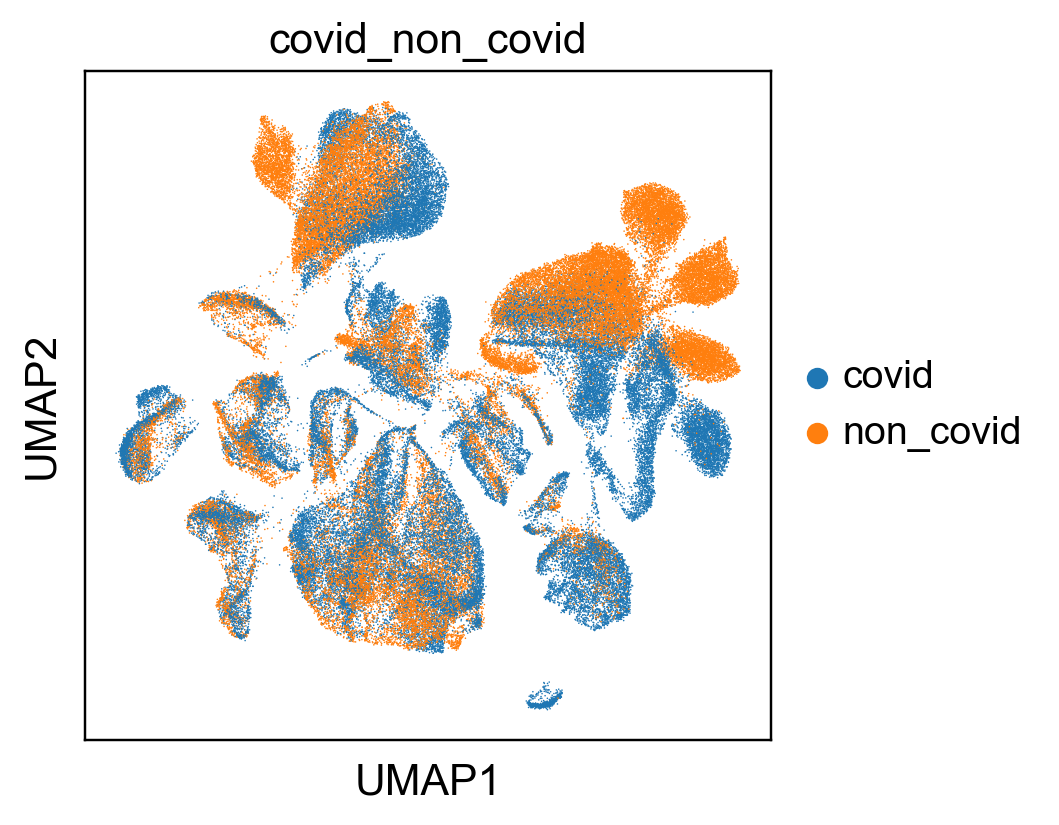

In [20]:
# Plot UMAP representation
sc.pl.umap(adata, color="covid_non_covid")

/opt/homebrew/Caskroom/miniforge/base/envs/scanpy_tutorial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


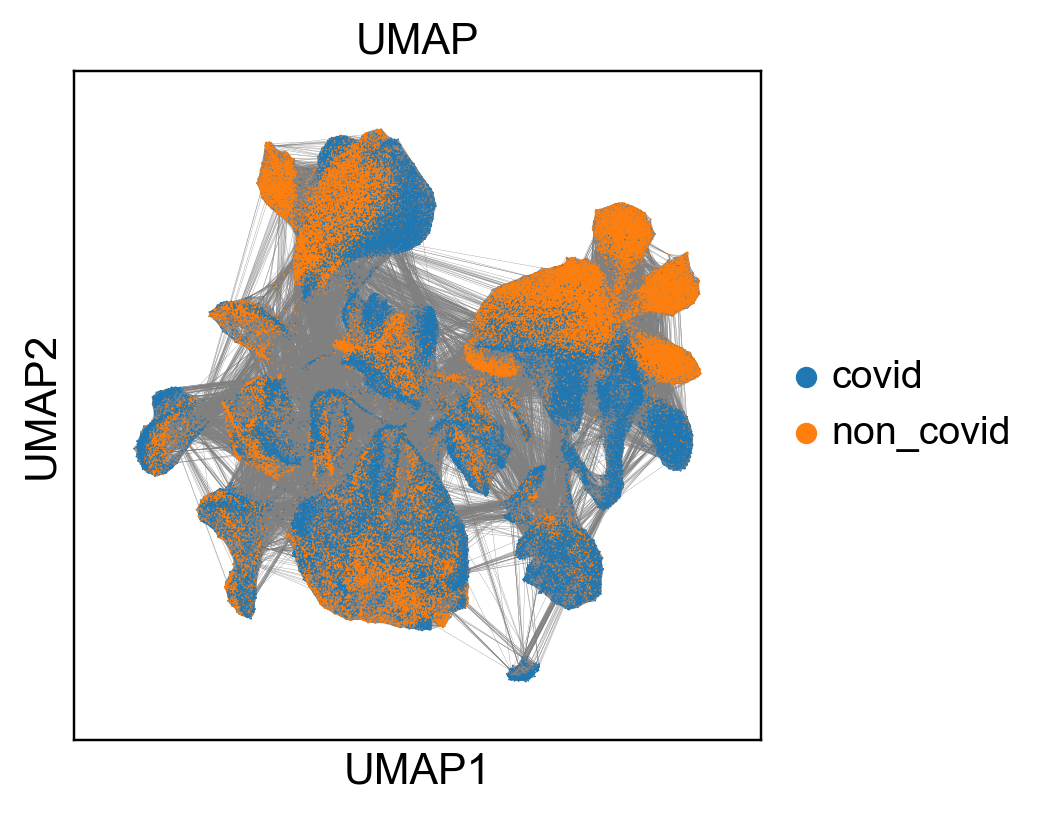

In [21]:
sc.pl.umap(adata, color="covid_non_covid", title="UMAP", edges=True)

### Comparing between clusters (covid and non_covid)

1. Creating a histogram or a probability density function (PDF) for each cluster
2. Comparing the shape, location, and spread of the distributions.

In [22]:
# Get the data points in each cluster to count the number of points
# most codes reffered from sc.pl.umap
basis_values = adata.obsm["X_umap"]  # shape: (n_samples, n_components) -> (5593, 2)

sample_vector = adata.obs["covid_non_covid"].values

In [23]:
df_pds = pd.DataFrame(list(zip(basis_values, sample_vector)), columns=["basis_value", "sample"])
df_pds.head()

# Vectors of UMAP representation of sample: covid
covid_vector = df_pds.query("sample == 'covid'")["basis_value"].values
non_covid_vector = df_pds.query("sample == 'non_covid'")["basis_value"].values

In [24]:
new_covid_vector = []

for v in covid_vector:
    new_covid_vector.append(list(v))

new_non_covid_vector = []

for v in non_covid_vector:
    new_non_covid_vector.append(list(v))

In [25]:
covid_vector = np.array(new_covid_vector)
non_covid_vector = np.array(new_non_covid_vector)

In [26]:
covid_vector

array([[  1.9399555,  -4.7525005],
       [-11.327367 ,   3.5376163],
       [ -1.5331637,  -3.4376059],
       ...,
       [ 13.821174 ,   4.935024 ],
       [ 13.45478  ,   3.5914252],
       [  9.94324  ,  -4.885163 ]], dtype=float32)

In [27]:
non_covid_vector

array([[ 1.9976877 , -5.646306  ],
       [ 1.9361167 , -5.221031  ],
       [ 2.5602765 , -6.24613   ],
       ...,
       [ 0.48318997, -4.135223  ],
       [ 5.4074078 , -5.1185727 ],
       [-6.833152  , -4.64989   ]], dtype=float32)

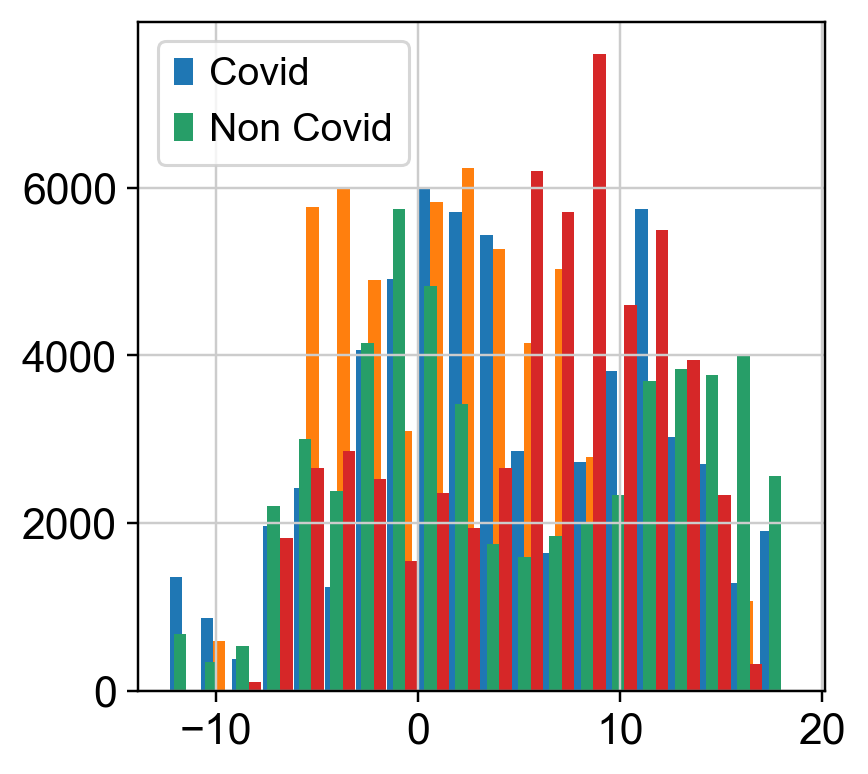

In [28]:
plt.hist(covid_vector, label="Covid", bins=20)
plt.hist(non_covid_vector, label="Non Covid", bins=20)
plt.legend()
plt.show()

bins: 149


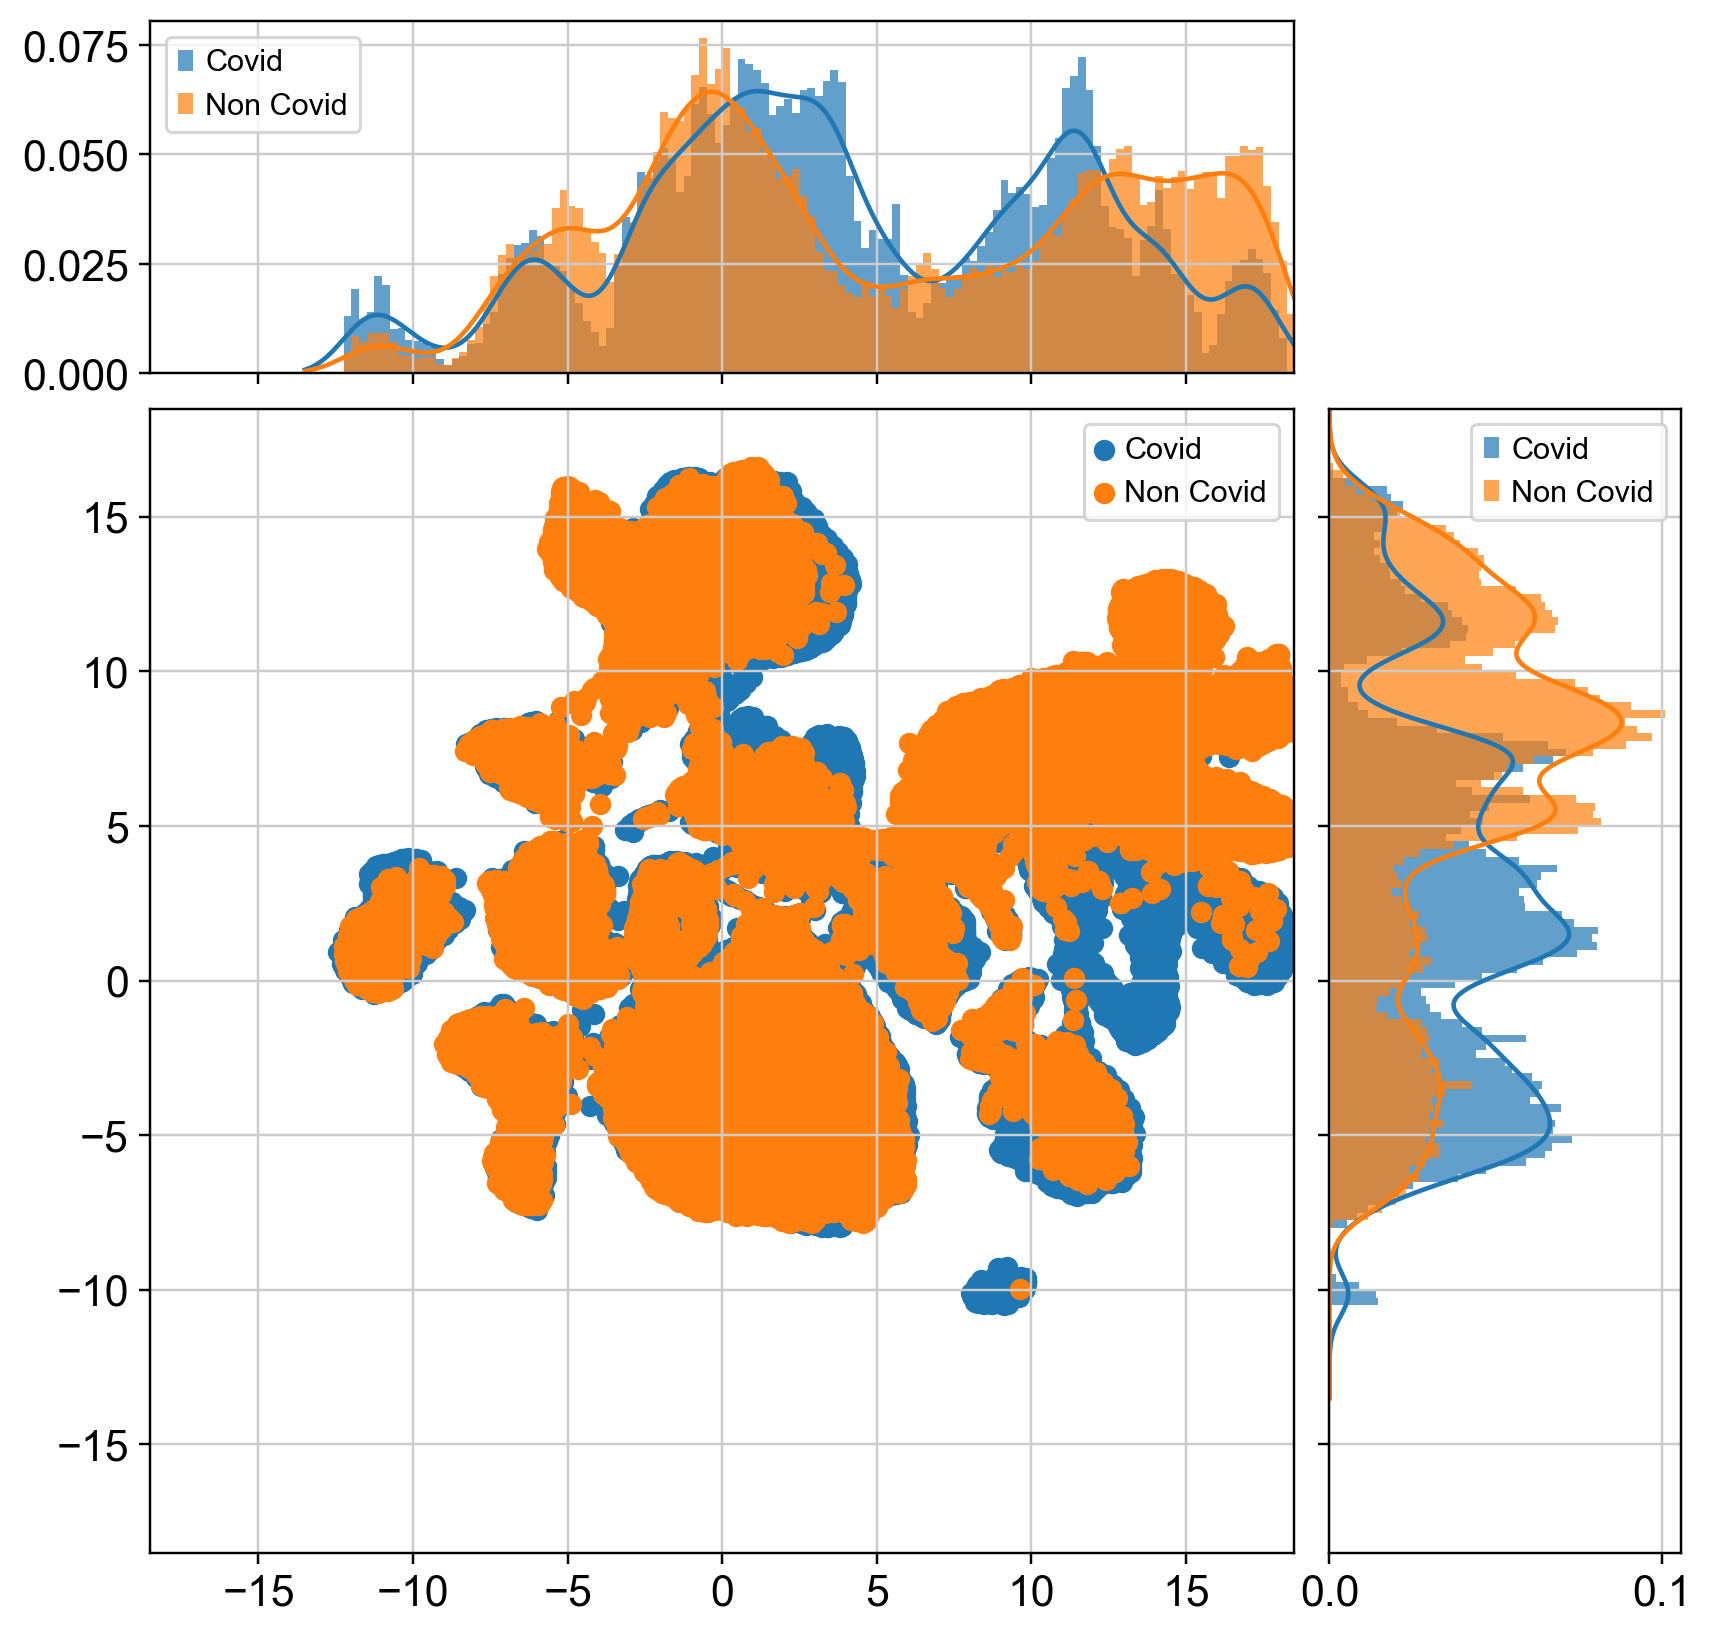

In [30]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

nullfmt = NullFormatter()

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
# x1, y1 -> Covid patient vectors
# x2, y2 -> Non-Covid patient vectors

x1 = covid_vector[:, 0]
y1 = covid_vector[:, 1]
x2 = non_covid_vector[:, 0]
y2 = non_covid_vector[:, 1]
axScatter.scatter(x1, y1, label="Covid")
axScatter.scatter(x2, y2, label="Non Covid")
axScatter.legend(prop={"size": 10})

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(y1))])
lim = (int(xymax / binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)  # this case, len(bins)=161
print("bins:", len(bins))

# Compote KDE
kde_x1 = stats.gaussian_kde(x1)
kde_y1 = stats.gaussian_kde(y1)
kde_x2 = stats.gaussian_kde(x2)
kde_y2 = stats.gaussian_kde(y2)
xx = np.linspace(-lim + 5, lim + 5, 2161)


# ax.hist(x, density=True, bins=bins, alpha=0.3)
# ax.plot(xx, kde(xx))

covid_color = "#1f77b4"
non_covid_color = "#ff7f0e"
# Hist plot
axHistx.hist(x1, bins=bins, label="Covid", density=True, color=covid_color, alpha=0.7)
axHistx.plot(xx, kde_x1(xx), color=covid_color)
axHisty.hist(y1, bins=bins, orientation="horizontal", label="Covid", density=True, alpha=0.7)
# To plot the horizontally orientated histgram (y histgram), we need to swap the kde plot variables between x and y.
axHisty.plot(kde_y1(xx), xx, color=covid_color)

axHistx.hist(x2, bins=bins, label="Non Covid", density=True, color=non_covid_color, alpha=0.7)
axHistx.plot(xx, kde_x2(xx), color=non_covid_color)
axHisty.hist(y2, bins=bins, orientation="horizontal", label="Non Covid", density=True, color=non_covid_color, alpha=0.7)
axHisty.plot(kde_y2(xx), xx, color=non_covid_color)


# kde = st.gaussian_kde(x)
# axHistx.plot(kde_xs, kde, label="PDF")

axHistx.legend(prop={"size": 10})
axHisty.legend(prop={"size": 10})

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.savefig("./output_pdfs/GSE159812_covid_non_covid_dist.pdf", format="pdf")
plt.show()

In [21]:
# Get the data points in each cluster to count the number of points
# most codes reffered from sc.pl.umap
basis_values = adata.obsm["X_umap"]  # shape: (n_samples, n_components) -> (5593, 2)

sample_vector = adata.obs["sample"].values

df_pds = pd.DataFrame(list(zip(basis_values, sample_vector)), columns=["basis_value", "sample"])
df_pds.head()

list_sample = ["covid_1", "covid_15", "covid_17", "ctrl_5", "ctrl_13", "ctrl_14"]
dict_vector = dict()

for sample in list_sample:
    # Vectors of UMAP representation of sample: covid
    dict_vector[sample] = df_pds.query(f"sample == '{sample}'")["basis_value"].values

In [22]:
temp_vector = []

for sample in list_sample:
    for v in dict_vector[sample]:
        temp_vector.append(list(v))

    dict_vector[sample] = temp_vector
    print(f"sample size of {sample}: {len(dict_vector[sample])}")
    temp_vector = []

sample size of covid_1: 854
sample size of covid_15: 582
sample size of covid_17: 1028
sample size of ctrl_5: 1018
sample size of ctrl_13: 1124
sample size of ctrl_14: 987


bins: 155
#1f77b4
#ff7f0e
#2ca02c
#9467bd
#8c564b
#e377c2


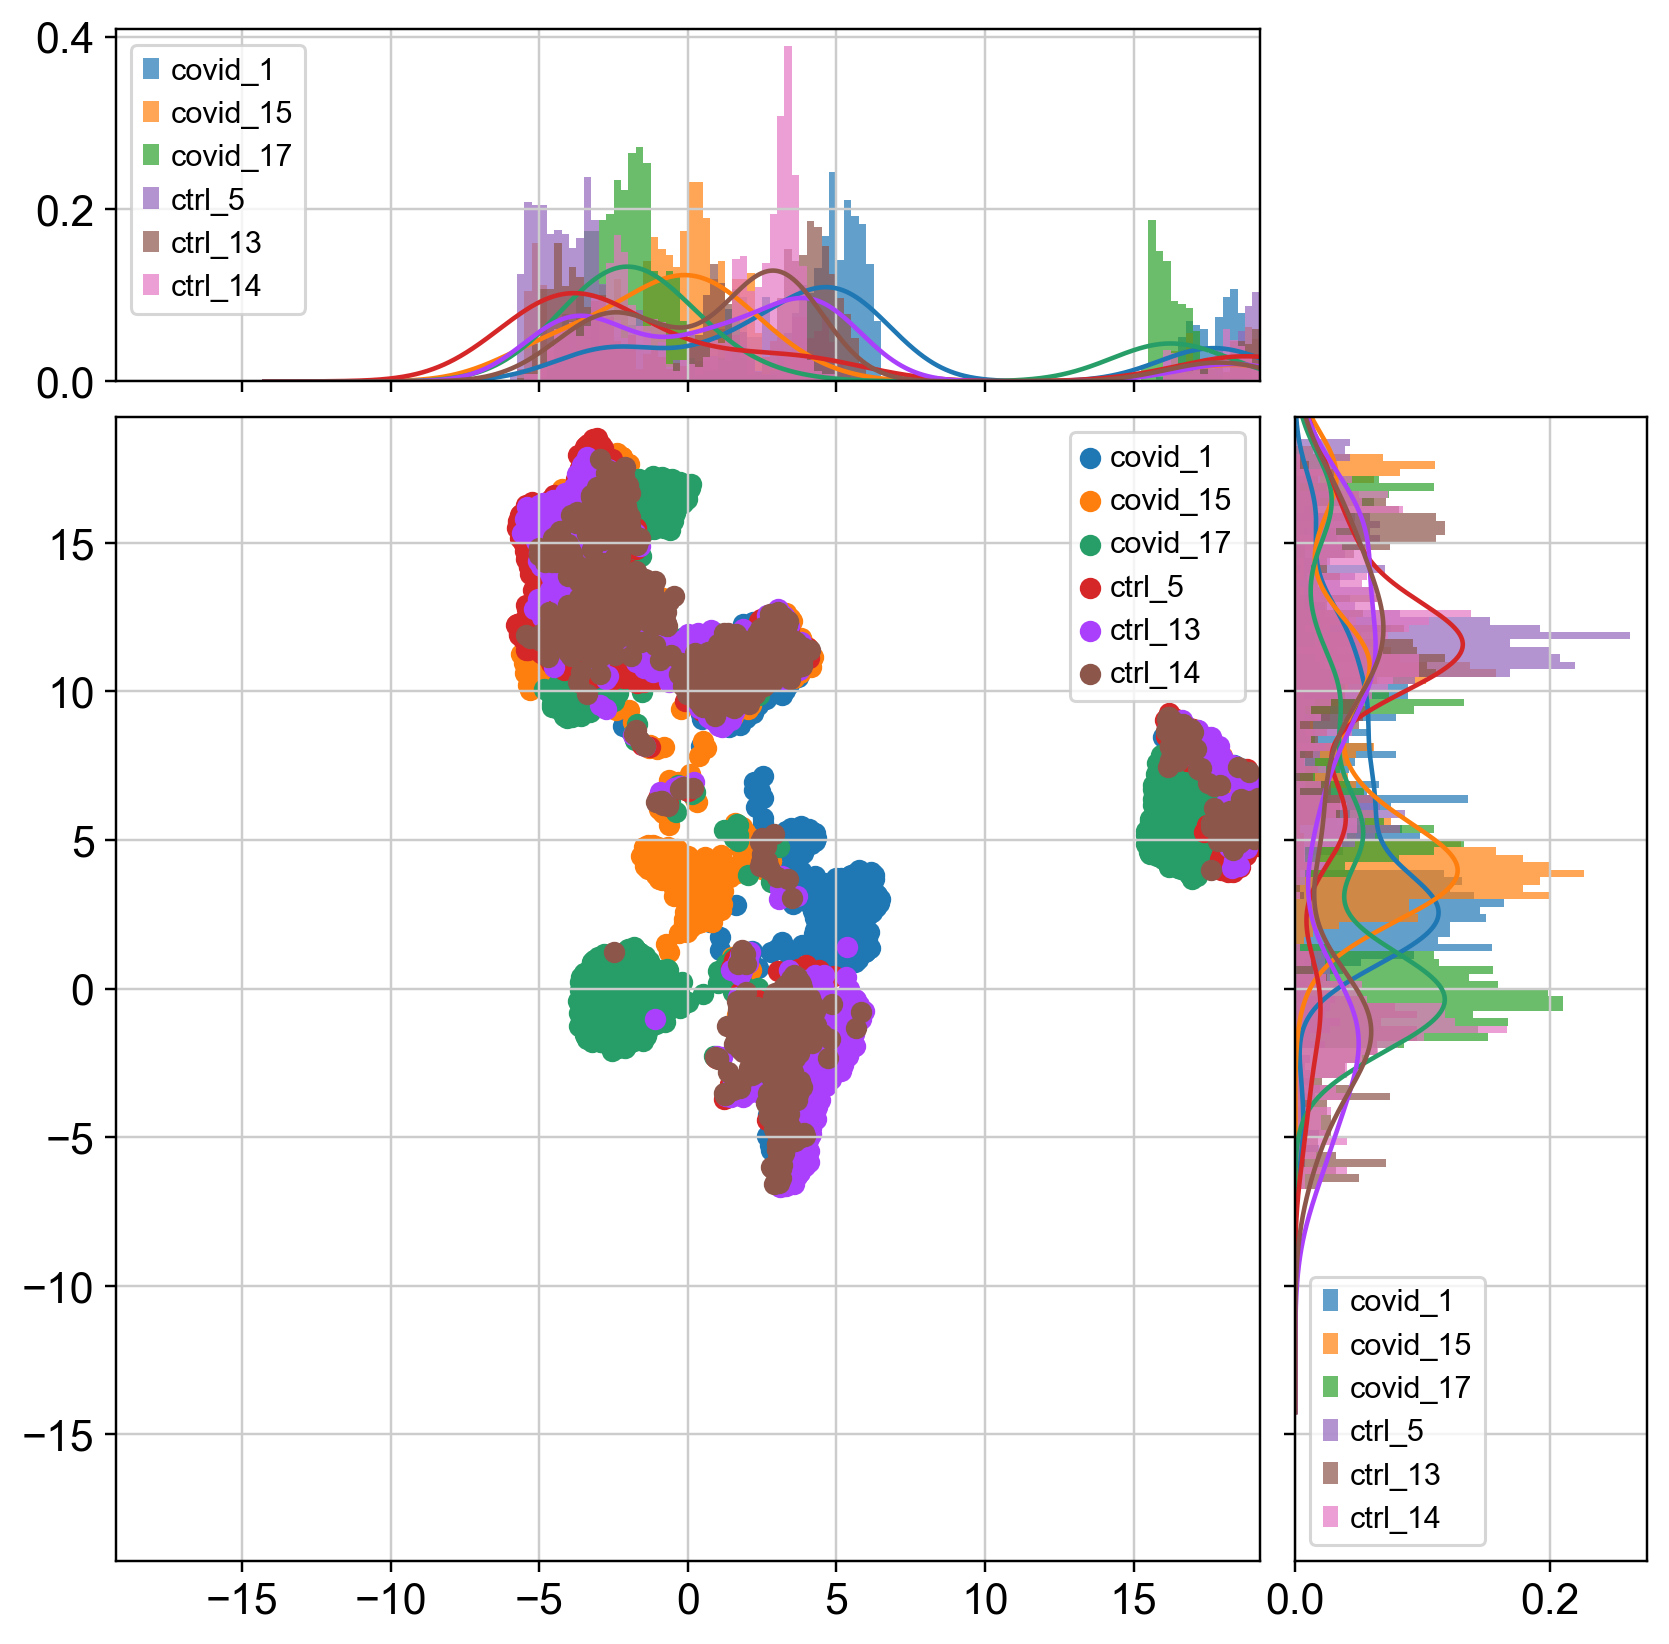

In [35]:
list_sample = ["covid_1", "covid_15", "covid_17", "ctrl_5", "ctrl_13", "ctrl_14"]
color_sample = {
    "covid_1": "#1f77b4",
    "covid_15": "#ff7f0e",
    "covid_17": "#2ca02c",
    "ctrl_5": "#9467bd",
    "ctrl_13": "#8c564b",
    "ctrl_14": "#e377c2",
}
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

nullfmt = NullFormatter()

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

for s, v in dict_vector.items():
    v = np.array(v)
    x1 = v[:, 0]
    y1 = v[:, 1]
    axScatter.scatter(x1, y1, label=s)

axScatter.legend(prop={"size": 10})

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(y1))])
lim = (int(xymax / binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)  # this case, len(bins)=161
print("bins:", len(bins))

# Compote KDE
for s, v in dict_vector.items():
    v = np.array(v)
    x1 = v[:, 0]
    y1 = v[:, 1]
    kde_x1 = stats.gaussian_kde(x1)
    kde_y1 = stats.gaussian_kde(y1)
    xx = np.linspace(-lim + 5, lim + 5, 2161)

    # Hist plot
    print(color_sample[s])
    axHistx.hist(x1, bins=bins, label=s, color=color_sample[s], density=True, alpha=0.7)
    axHistx.plot(xx, kde_x1(xx))
    axHisty.hist(y1, bins=bins, orientation="horizontal", label=s, color=color_sample[s], density=True, alpha=0.7)
    # To plot the horizontally orientated histgram (y histgram), we need to swap the kde plot variables between x and y.
    axHisty.plot(kde_y1(xx), xx)


# kde = st.gaussian_kde(x)
# axHistx.plot(kde_xs, kde, label="PDF")

axHistx.legend(prop={"size": 10})
axHisty.legend(prop={"size": 10})

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

## Sample Classification using PDF

### Input data
PDE

Train dataset:
covid_1, covid_15, ctrl_5, ctl_13
Test dataset:
covid_17, ctlr_14

### Classification model
Binary classification (covid or non_covid). <br>
• 'covid_" -> covid <br>
• "ctlr_" -> non_covid.

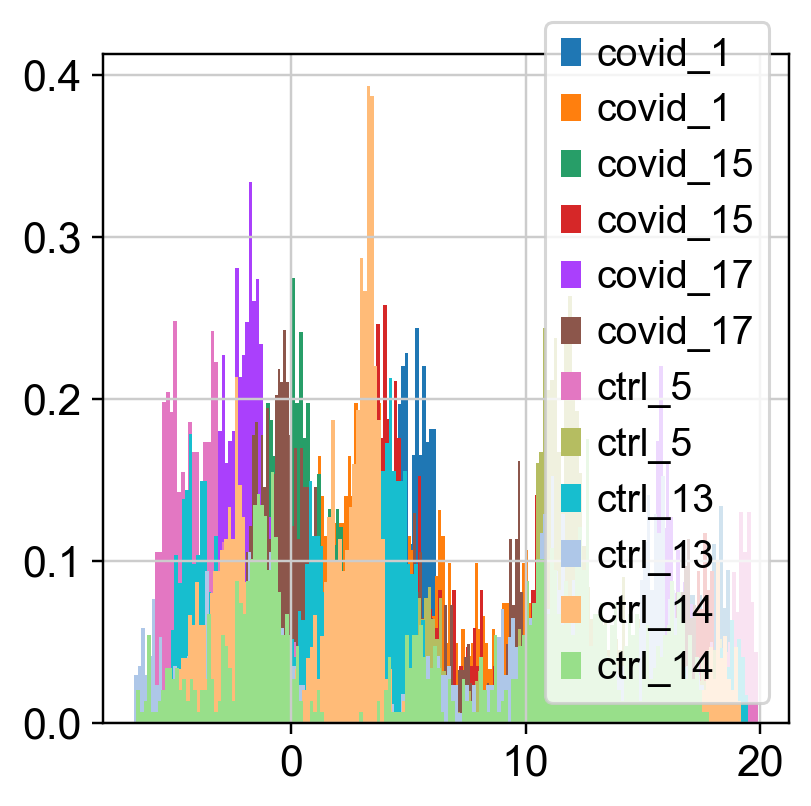

In [78]:
# Compote KDE
dict_hist_sample = dict()
for s, v in dict_vector.items():
    v = np.array(v)
    x1 = v[:, 0]
    y1 = v[:, 1]

    # Create the histogram
    hist_x, bins_x = np.histogram(x1, bins=162, density=True)
    hist_y, bins_y = np.histogram(y1, bins=162, density=True)

    dict_hist_sample[s] = [hist_x, hist_y]
    # Plot the histogram
    plt.hist(x1, bins=162, density=True, label=s)
    plt.hist(y1, bins=162, density=True, label=s)

plt.legend()
plt.show()

In [128]:
train_sample = np.array(["covid_1", "covid_15", "ctrl_5", "ctrl_13"])
np.random.shuffle(train_sample)

test_sample = ["covid_17", "ctrl_14"]
X_train = []
y_train = []
X_test = []
y_test = []
y_test_sample_idex = dict()
begin = 0
for sample, hists in dict_hist_sample.items():
    if sample in train_sample:
        for hist in hists:
            X_train.append(hist)
            if "covid" in sample:
                y_train.append("covid")
            else:
                y_train.append("non_covid")
    else:
        for hist in hists:
            X_test.append(hist)
            if "covid" in sample:
                y_test.append("covid")
            else:
                y_test.append("non_covid")

        if not sample in y_test_sample_idex.keys():
            y_test_sample_idex[sample] = []

        y_test_sample_idex[sample].append(begin)
        begin += 2

In [129]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)
print(y_test_sample_idex)

(8, 162)
(4, 162)
(8,)
(4,)
{'covid_17': [0], 'ctrl_14': [2]}


In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

# Set up the classifier
clf = DecisionTreeClassifier()
# Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# Fit the classifier to the data
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_train)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_train, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_train, y_pred, average="micro"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_train, y_pred, average="micro"))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [131]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average="micro"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred, average="micro"))

Accuracy: 0.5
Precision: 0.5
Recall: 0.5


In [148]:
print("y_true:", y_test)
print("y_pred:", y_pred)

print("----------------------------------------------------")


# if the both x and y's pred is the same, return the predicted label.
# Otherwise, it's ambiguous, thus, we can't decide which one is covid or non covid.
for i, v in y_test_sample_idex.items():
    test_true_labels = []
    if "covid" in i:
        test_true_labels.append("covid")
    else:
        test_true_labels.append("non_covid")

    print("true label on the test data:", test_true_labels)
    print(f"predicted labels on (x, y) features: [{str(y_pred[int(v[0])])}, {str(y_pred[int(v[0])+1])}]")

y_true: ['covid', 'covid', 'non_covid', 'non_covid']
y_pred: ['non_covid' 'covid' 'covid' 'non_covid']
----------------------------------------------------
true label on the test data: ['covid']
predicted labels on (x, y) features: [non_covid, covid]
true label on the test data: ['non_covid']
predicted labels on (x, y) features: [covid, non_covid]
